# Hands-on Exercise for Module 1: Exploratory Data Analysis

### 0.Importing important packages

In [330]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn import datasets
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            

### 1. Loading data, determining samples, attributes, and types of attributes

Use Davis dataset avaialble at the url https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv
    
Description of the data is provided at http://math.furman.edu/~dcs/courses/math47/R/library/car/html/Davis.html

Drop rows in the data set with missing values (NA), using dropna(inplace=True) function.

<span style="color:red">**Question 1a:** </span> Based on the data description, ware the data points and what are the attributes in this data? <br>

<span style="color:green">Answer:</span> The data has 200 data points and each row has 6 attributes:
<li>Unnamed (ID)
<li>Sex</li>
<li>weight - Kgs</li>
<li>height - cm</li>
<li>Reported weight - Kg</li>
<li>reported height - cm</li>

<span style="color:red">**Question 1b:** </span> Who are selected as subjects in the study? <br>

<span style="color:green">Answer:</span> The subjects are men and women engaged in regular exercise

<span style="color:red">**Question 1c:** </span> How many data points are in this dataset? <br>

In [331]:
davis_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv')

In [332]:
davis_df.dropna(inplace=True);

In [333]:
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
194,195,F,62,164,61.0,161.0
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
198,199,M,90,181,91.0,178.0


 <span style="color:green">Answer:</span> There are 200 data points in this dataset with 19 points having NaN values in repwt and repht

<span style="color:red">**Question 1d:** </span> How many attributes are in this dataset? <br>

 <span style="color:green">Answer:</span> There are 6 attributes in this dataset

<span style="color:red">**Question 1e:** </span> What type of attributes are present in the dataset? <br> 
       

In [334]:
davis_df.dtypes

Unnamed: 0      int64
sex            object
weight          int64
height          int64
repwt         float64
repht         float64
dtype: object

 <span style="color:green">Answer:</span> 
 <li>Unnamed (ID) - numeric discrete</li>
 <li>Sex - Categorical Nominal</li>
 <li>weight - numeric discrete</li>
 <li>height - numeric discrete</li>
 <li>repwt - numeric continuous</li>
 <li>repht - numeric continuous</li>

### 2. Generating summary statistics

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

In [335]:
davis_df.drop(columns=davis_df.columns[davis_df.columns.str.contains('unnamed', case=False)], inplace=True)
davis_df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


<span style="color:red">**Question 2a:** </span> What are range of values the numeric attributes take? <br> 
[Hint: Use exclude=object option in describe() function to ignore the attribute sex]

In [336]:
davis_df.describe(exclude='object')

,weight,height,repwt,repht
count,181.000000,181.000000,181.000000,181.000000
mean,66.303867,170.154696,65.679558,168.657459
std,15.340992,12.312069,13.834220,9.394668
min,39.000000,57.000000,41.000000,148.000000
25%,56.000000,164.000000,55.000000,161.000000
50%,63.000000,169.000000,63.000000,168.000000
75%,75.000000,178.000000,74.000000,175.000000
max,166.000000,197.000000,124.000000,200.000000


 <span style="color:green">Answer:</span> Ranges:
 <li>wt - [39,166] Kgs</li>
 <li>ht - [57,197] cms</li>
 <li>repwt -  [41,124] Kgs</li>
 <li>repht -  [148,200] cms</li>

<span style="color:red">**Question 2b:** </span> What different values do categorical attributes take? <br> 
[Hint: Use include=object option in describe() function to ignore the attribute sex]

In [337]:
davis_df["sex"].value_counts()

F    99
M    82
Name: sex, dtype: int64

 <span style="color:green">Answer:</span> F and M

<span style="color:red">**Question 2c:** </span> What are the mean values for each of the numeric attributes? <br> 

In [338]:
davis_df.mean()

weight     66.303867
height    170.154696
repwt      65.679558
repht     168.657459
dtype: float64

<span style="color:red">**Question 2d:** </span> What is the variance for each of the numeric attributes? <br> 

In [339]:
davis_df.var()

weight    235.346041
height    151.587047
repwt     191.385635
repht      88.259791
dtype: float64

<span style="color:red">**Question 2e:** </span> Visually examine how the attribute 'weight' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

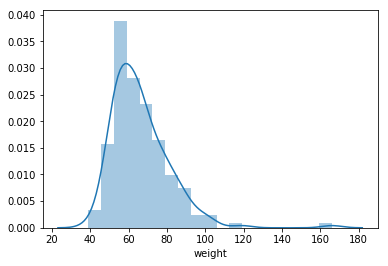

In [340]:
sns.distplot(davis_df["weight"])

 <span style="color:green">Answer:</span> It is a right skewed distribution similar to gaussian distribution

<span style="color:red">**Question 2f:** </span> Visually examine how the attribute 'height' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

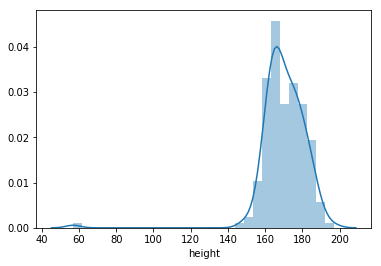

In [341]:
sns.distplot(davis_df["height"])

 <span style="color:green">Answer:</span> It is a left skewed distribution similar to gaussian distribution

<span style="color:red">**Question 2g:** </span> Visually examine how the attribute 'repwt' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

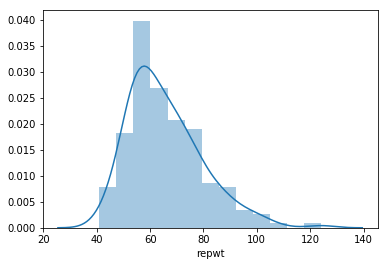

In [342]:
sns.distplot(davis_df["repwt"])

 <span style="color:green">Answer:</span> It is a right skewed distribution similar to gaussian distribution

<span style="color:red">**Question 2h:** </span> Visually examine how the attribute 'repht' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

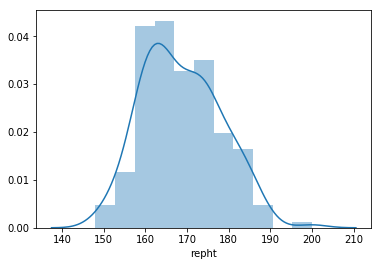

In [343]:
sns.distplot(davis_df["repht"])

 <span style="color:green">Answer:</span> It is not a gaussian distribution but seems more like a bimodal distribution as it has 2 modes

<span style="color:red">**Question 2i:** </span> Visually examine how the attribute 'sex' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution? 

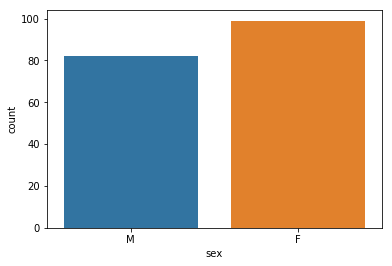

In [344]:
sns.countplot(davis_df["sex"])

 <span style="color:green">Answer:</span> Here we cannot comment on the distribution being similar or not to Gaussian distribution since there is no order. We can only see the frequency of each value in the attribute 

<span style="color:red">**Question 2j:** </span> Is it possible for attribute 'sex' to follow a Gaussian distribution? Support your answer with a rationale. 

Sex is a categorical nominal attribute. Here we cannot comment on the distribution being similar or not to Gaussian distribution since there is no order.

### 3. Geometric and Probabilistic view

<span style="color:brown">**Note:** </span> For this part, we will restrict to 'repwt' and 'repht' attributes in the davis dataset as we can only visualize 2D space.

In [345]:
davis_df_new = davis_df[['repwt','repht']]

In [346]:
davis_df_new.head()

,repwt,repht
0,77.0,180.0
1,51.0,159.0
2,54.0,158.0
3,70.0,175.0
4,59.0,155.0


<span style="color:red">**Question 3a:** </span> Show the Geometric view of this data 'davis_df_new' on a 2D space along with the mean. 

[ 65.67955801 168.65745856]


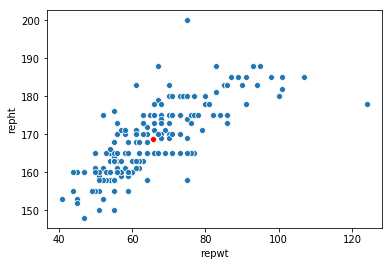

In [347]:
fig, ax = plt.subplots()
sns.scatterplot(x='repwt',y='repht',data=davis_df_new,ax=ax)
mu = np.mean(davis_df_new.values,0)
print(mu)
sns.scatterplot(x=[mu[0],mu[0]],y=[mu[1],mu[1]],color = 'r', ax=ax)

<span style="color:green">Answer:</span> Mean = [65.68, 168.66]

<span style="color:red">**Question 3b:** </span> From the geometric view, state your observations about the data and any relationships you observe between the attributes. 

As repwt increases, repht also increases. There seems to be a positive linear relationship between repht, repwt

We will further normalize the magnitude of each row in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_row_norm.

In [348]:
from sklearn.preprocessing import normalize
davis_df_new_row_norm = normalize(davis_df_new, axis=1, norm='l2')
davis_df_norm = pd.DataFrame(davis_df_new_row_norm,columns = ['norm1','norm2'])
davis_df_new_row_norm

array([[0.39330275, 0.91940902],
       [0.30542755, 0.95221532],
       [0.32340548, 0.94626048],
       [0.37139068, 0.92847669],
       [0.35574458, 0.93458322],
       [0.41835989, 0.90828134],
       [0.42288547, 0.90618314],
       [0.37582461, 0.92669081],
       [0.37595091, 0.92663958],
       [0.35232976, 0.93587592],
       [0.39582935, 0.91832409],
       [0.32491761, 0.94574233],
       [0.31261835, 0.94987882],
       [0.3616281 , 0.93232243],
       [0.33559036, 0.94200802],
       [0.37139068, 0.92847669],
       [0.47918451, 0.8777142 ],
       [0.3517451 , 0.93609582],
       [0.35112344, 0.93632918],
       [0.33598745, 0.94186646],
       [0.57160461, 0.8205292 ],
       [0.33773899, 0.94123981],
       [0.35644445, 0.93431652],
       [0.38074981, 0.9246781 ],
       [0.33135088, 0.9435076 ],
       [0.2900074 , 0.9570244 ],
       [0.34129379, 0.93995667],
       [0.35112344, 0.93632918],
       [0.25884127, 0.96591987],
       [0.48564293, 0.87415728],
       [0.

In [349]:
davis_df_norm

,norm1,norm2
0,0.393303,0.919409
1,0.305428,0.952215
2,0.323405,0.946260
3,0.371391,0.928477
4,0.355745,0.934583
...,...,...
176,0.354304,0.935130
177,0.375951,0.926640
178,0.406138,0.913812
179,0.455199,0.890390


<span style="color:red">**Question 3c:** </span> Show the Geometric view of this new row normalized data on a 2D space along with the mean. 

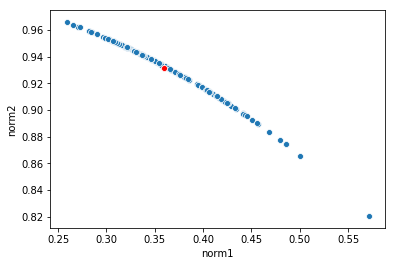

In [350]:
fig, ax = plt.subplots()
sns.scatterplot(x='norm1',y='norm2',data=davis_df_norm,ax=ax)
mu = np.mean(davis_df_norm.values,0)
sns.scatterplot(x=[mu[0],mu[0]],y=[mu[1],mu[1]],color = 'r',data=davis_df_norm,ax=ax)

<span style="color:red">**Question 3d:** </span> Comment on the new geomateric view of the data in comparison to the view you observed in Question 3b. Provide a reason for the difference in the two geometric views.

 <span style="color:green">Answer:</span> Since this is the standardized form of the original matrix, this gives the correlation between the two variables. There is a strong negative correlation between repht and repwt. The correlation changes while doing normalization along the rows instead of columns since the units are different. The euclidean distance doesn't distinguish for 2 different units. Had we done normalization along the columns, the correlation graph will have similar structure.

<span style="color:red">**Question 3e:** </span> Show the Probabilistic view of the data davis_df_new.

In [351]:
from scipy.stats import multivariate_normal

mu = np.mean(davis_df_new.values,0)
sigma = np.cov(davis_df_new.values.transpose())
min_wt = np.min(davis_df_new.values[:,0])
min_ht = np.min(davis_df_new.values[:,1])
max_wt = np.max(davis_df_new.values[:,0])
max_ht = np.max(davis_df_new.values[:,1])
# ?np.mgrid
x,y = np.mgrid[min_wt:max_wt:50j, min_ht:max_ht:50j]

positions = np.empty(x.shape + (2,))
positions[:,:,0] = x
positions[:,:,1] = y

F = multivariate_normal(mu,sigma)
Z = F.pdf(positions)

sigma

array([[191.38563536,  99.01740331],
       [ 99.01740331,  88.25979128]])

Text(0.5, 1.0, 'Probabilistic view')

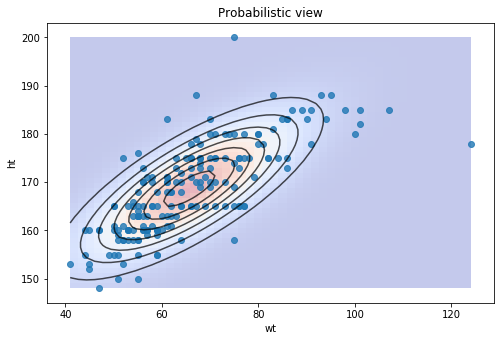

In [352]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap = 'coolwarm', extent = [min_wt,max_wt,min_ht,max_ht], alpha = 0.3)
cset = ax.contour(x,y,Z,colors='k', alpha = 0.7)
plt.scatter(davis_df_new.values[:,0],davis_df_new.values[:,1],alpha=0.8)
ax.set_xlabel('wt')
ax.set_ylabel('ht')
plt.title('Probabilistic view')

We will normalize the magnitude of each column in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_col_norm.

In [353]:
from sklearn.preprocessing import normalize
davis_df_norm = normalize(davis_df_new, axis=0, norm='l2')
davis_df_new_row_norm = pd.DataFrame(davis_df_norm,columns = ['norm_1','norm_2'])
davis_df_norm

array([[0.08527974, 0.07920611],
       [0.05648398, 0.06996539],
       [0.05980657, 0.06952536],
       [0.07752703, 0.07700594],
       [0.06534421, 0.06820526],
       [0.08417221, 0.0726056 ],
       [0.08527974, 0.0726056 ],
       [0.08084962, 0.07920611],
       [0.07863456, 0.07700594],
       [0.07088186, 0.07480577],
       [0.08306468, 0.0765659 ],
       [0.06202163, 0.07172553],
       [0.05759151, 0.06952536],
       [0.07088186, 0.0726056 ],
       [0.06312916, 0.07040543],
       [0.07309692, 0.0726056 ],
       [0.11186043, 0.08140627],
       [0.0686668 , 0.0726056 ],
       [0.08306468, 0.08800678],
       [0.06755927, 0.0752458 ],
       [0.1373336 , 0.07832604],
       [0.06755927, 0.07480577],
       [0.07309692, 0.07612587],
       [0.07752703, 0.07480577],
       [0.06534421, 0.0739257 ],
       [0.05537645, 0.0726056 ],
       [0.06755927, 0.0739257 ],
       [0.06645174, 0.07040543],
       [0.04540869, 0.06732519],
       [0.11075291, 0.07920611],
       [0.

In [354]:
davis_df_new_row_norm

,norm_1,norm_2
0,0.085280,0.079206
1,0.056484,0.069965
2,0.059807,0.069525
3,0.077527,0.077006
4,0.065344,0.068205
...,...,...
176,0.067559,0.070845
177,0.078635,0.077006
178,0.088602,0.079206
179,0.100785,0.078326


<span style="color:red">**Question 3f:** </span> Show the Probabilistic view of the data davis_df_new_col_norm. 

In [355]:
from scipy.stats import multivariate_normal

mu = np.mean(davis_df_new_row_norm.values,0)
sigma = np.cov(davis_df_new_row_norm.values.transpose())
min_wt = np.min(davis_df_new_row_norm.values[:,0])
min_ht = np.min(davis_df_new_row_norm.values[:,1])
max_wt = np.max(davis_df_new_row_norm.values[:,0])
max_ht = np.max(davis_df_new_row_norm.values[:,1])
# ?np.mgrid
x,y = np.mgrid[min_wt:max_wt:50j, min_ht:max_ht:50j]

positions = np.empty(x.shape + (2,))
positions[:,:,0] = x
positions[:,:,1] = y

F = multivariate_normal(mu,sigma)
Z = F.pdf(positions)

sigma

array([[2.34757565e-04, 4.82561662e-05],
       [4.82561662e-05, 1.70897301e-05]])

Text(0.5, 1.0, 'Probabilistic view')

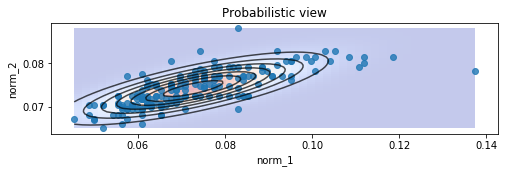

In [356]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap = 'coolwarm', extent = [min_wt,max_wt,min_ht,max_ht], alpha = 0.3)
cset = ax.contour(x,y,Z,colors='k', alpha = 0.7)
plt.scatter(davis_df_new_row_norm.values[:,0],davis_df_new_row_norm.values[:,1],alpha=0.8)
ax.set_xlabel('norm_1')
ax.set_ylabel('norm_2')
plt.title('Probabilistic view')

<span style="color:red">**Question 3g:** </span> Compare the shape of the covariance structure in Question 3f with that of Question 3e and comment if column normalization has affected the shape of the covariance structure.

<span style="color:green">Answer:</span>  The shape of covariance structure in 3f and 3e is very similar but in 3f it is more compact than before. The column normalization has not affected the shape of covariance matrix

### 4. Understanding the (in)dependencies among attributes using Covariance matrix

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

<span style="color:red">**Question 4a:** </span> Compute the covariance matrix.

In [357]:
davis_df.cov()

,weight,height,repwt,repht
weight,235.346041,29.136065,177.292357,91.004665
height,29.136065,151.587047,102.833180,85.497729
repwt,177.292357,102.833180,191.385635,99.017403
repht,91.004665,85.497729,99.017403,88.259791


In [358]:
davis_df

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0
...,...,...,...,...,...
194,F,62,164,61.0,161.0
195,M,74,175,71.0,175.0
196,M,83,180,80.0,180.0
198,M,90,181,91.0,178.0


<span style="color:red">**Question 4b:** </span> Which pairs of attributes co-vary in the opposite direction?

<span style="color:green">Answer: </span> Each attribute grows on increasing the other one. Hence, none of the attributes co-vary in different directions

<span style="color:red">**Question 4c:** </span> Compute the correlation matrix.

In [359]:
davis_df.corr()

,weight,height,repwt,repht
weight,1.000000,0.154258,0.835376,0.631435
height,0.154258,1.000000,0.603737,0.739166
repwt,0.835376,0.603737,1.000000,0.761860
repht,0.631435,0.739166,0.761860,1.000000


<span style="color:red">**Question 4d:** </span> Which pairs of attributes are highly correlated? Clearly specify the highly positive and highly negatively correlated attributes.

<span style="color:green">Answer: </span> 
Positively correlated: (decreasing order of correlation) 
<li>1. repwt & weight </li>
<li>2. repht & repwt </li>
<li>3. repht & height</li> 
<li>4. repht & weight</li> 
<li>5. repwt & height</li> 
Highly Negatively correlated: None

<span style="color:red">**Question 4e:** </span> Which pairs of attributes are uncorrelated?

<span style="color:green">Answer:</span>  Uncorrelated: height & weight

<span style="color:red">**Question 4f:** </span> What information did you gather from a correlation matrix that is not available in a covariance matrix?

<span style="color:green">Answer:</span> Correlation matrix gives the strength of correlation between 2 variables as it is normalized between 0 & 1

### 5. Dimensionality Reduction: Feature Selection

**Data:** Iris dataset from the practice notebook. (https://raw.githubusercontent.com/plotly/datasets/master/iris.csv)

**Assumption:** Assume that your goal is to cluster the data to identify the species 'Name'. Clustering algorithm takes as input data points and attributes. It groups points that are similar to each other into a separate cluster. It puts points that are dissimilar in different cluster. Note that the 'Name' attribute will be hidden from the clustering algorithm.

In [360]:
import seaborn as sns
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [361]:
iris_df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<span style="color:red">**Question 5a:** </span> If you are allowed to select only one attribute, which attribute would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

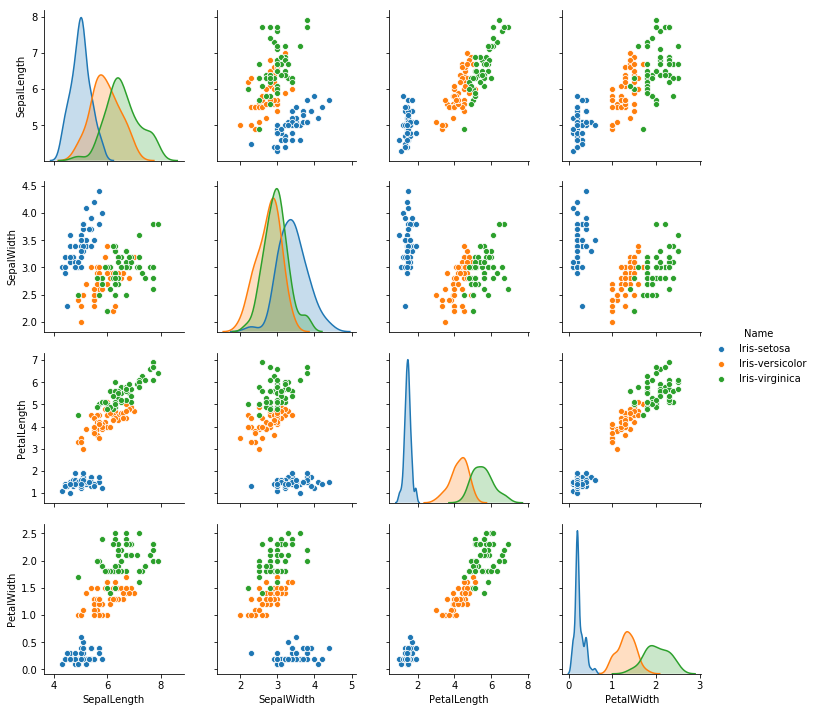

In [362]:
sns.pairplot(iris_df,hue='Name')

<span style="color:green">Answer:</span> PetalLength to be the best select. As per the histogram seen in pairplot, we can see a clear separation of class Iris-setosa from Iris-versicolor and Iris-Virginica. However, it will be difficult to separate versicolor and virginica in either PetalLength or PetalWidth. The mean of each category has similar difference in both PetalLength and PetalWidth

<span style="color:red">**Question 5b:** </span> If you are allowed to select only two features, which feature would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

<span style="color:green">Answer:</span> PetalLength and PetalWidth seem to be useful for clustering task since the distance between mean of the different category clusters seem to be farthest while the variance between each category seem to be least. 

<span style="color:red">**Question 5c:** </span>In real-world problems ground-truth (types of iris plants) will not be available to select the features, how do you perform **feature selection** in that case? 

<span style="color:green">Answer:</span> Feature selection can be performed by making use of correlation matrix. One of the features can be selected from the ones that are highly correlated (as they may be redundant) while we can also remove irrelevant features.
We can further look at the non-labelled data and identify some patterns using unsupervised learning algorithms and select the data based on that

### 6. Dimensionality Reduction: PCA on Iris Data

<span style="color:red">**Question 6a:** </span> Perform PCA on Iris dataset and project the data onto the first two principal components. Use the attributes 'SepalLength','SepalWidth','PetalLength', and 'PetalWidth'. 

Hint: Use iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']] to use the specified attributes.

In [363]:
# iris_df.drop(iris_df.columns[[4]],axis=1,inplace=True)
pca=PCA(2)
projected = pca.fit_transform(iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']])
print(iris_df.shape)
print(projected.shape)
projected_df = pd.DataFrame(projected,columns = ['pc1','pc2'])
iris_df_new = pd.concat([projected_df,iris_df[['Name']]],axis=1)

(150, 5)
(150, 2)


<span style="color:red">**Question 6b:** </span> Generate a pairplot (along with colors for the different types of iris plants) between the two newly generated features using PCA in the above step.

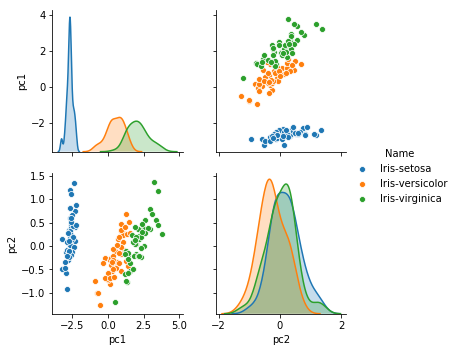

In [364]:
iris_df_new
sns.pairplot(iris_df_new,hue='Name')

<span style="color:red">**Question 6c:** </span> From the above pairplot, if only one newly generated attribute were to be used for clustering the data which newly generated attribute is best suited. Provide a reason. Is the newly generated attribute better than the feature selected in Question 5a?

<span style="color:green">Answer:</span> first principal component (attribute) can be used for clustering data since the separation of classes is best. However, the newly generated attribute is not better than the feature selected in Q5a because even the PC1 cannot separate Versicolor and Virginica

<span style="color:red">**Question 6d:** </span> From the above pairplot, if two newly generated attributes were to be used for clustering the data, are the two newly generated attributes better than the features selected in Question 5b?

<span style="color:green">Answer:</span> The two newly generated attributes are not better than the features selected in Q5b as a similar separation can be done without PCA as well.

<span style="color:red">**Question 6e:** </span> In general, are principal components guaranteed to be more informative than the original features for the data mining task at hand?

<span style="color:green">Answer:</span> No, the principal components are not guaranteed to be more informative than the original features

<span style="color:red">**Question 6f:** </span>In real-world problems ground-truth (types of iris plants) will not be available to determine if the principal compoents or original features are better suited for the data mining task at hand. How should one proceed with the data mining task?

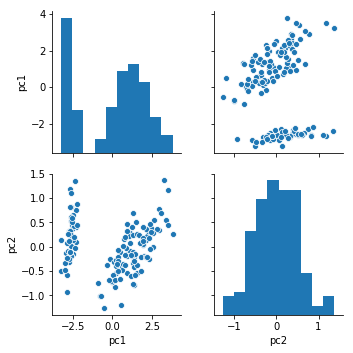

In [365]:
sns.pairplot(iris_df_new)

<span style="color:green">Answer:</span> If dimensions are correlated then we can try performing PCA to reduce the dimensions. If they are not correlated, we can use feature selection instead of PCA.

### 7. Dimensionality Reduction: PCA on synthetic datasets

Consider the following synthetic dataset we refer to as **Blobs**. This dataset has 500 data points centered around (-5, -5), (0,0) and (5,5). This dataset has 1500 data points and 2 attributes.

In [366]:
n_samples = 1500
random_state = 42
centers = [(-5, -5), (0, 0), (5, 5)]
Blobs_X, Blobs_y = datasets.make_blobs(n_samples=n_samples,centers=centers,random_state=random_state)

In [367]:
Blobs_X.shape

(1500, 2)

Text(0.5, 1.0, 'Blobs')

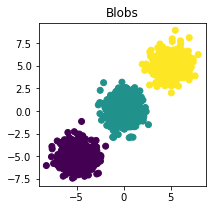

In [368]:
plt.figure(figsize=(3,3))
plt.scatter(Blobs_X[:, 0], Blobs_X[:, 1], c= Blobs_y)
plt.title('Blobs')


We generated a new dataset **Blobs1** by adding an extra attribute to this 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 1.

In [369]:
Blobs1= pd.DataFrame(Blobs_X)
Blobs1['2'] = np.random.randn(1500)
Blobs1.head()

,0,1,2
0,0.168461,1.317598,0.350127
1,-3.534351,-5.225776,-0.157394
2,-6.525525,-5.691908,0.852747
3,-0.120948,0.419532,2.708047
4,-5.469474,-4.457440,0.139864


We generated a new dataset **Blobs2** by adding an extra attribute to the 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 100. Read more about how to do this at https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html.

In [370]:
Blobs2= pd.DataFrame(Blobs_X)
Blobs2['2'] = np.random.randn(1500)*10
Blobs2.head()

,0,1,2
0,0.168461,1.317598,-4.343115
1,-3.534351,-5.225776,-3.069853
2,-6.525525,-5.691908,8.856817
3,-0.120948,0.419532,-3.581329
4,-5.469474,-4.457440,-11.543435


We generated a new dataset **Blobs3** by adding two extra attributes to the 2D Blobs dataset. The values for the two new attributes are drawn from a normal distribution with mean 0 and variance 100. 

In [371]:
Blobs3= pd.DataFrame(Blobs_X)
Blobs3['2'] = np.random.randn(1500)*10
Blobs3['3'] = np.random.randn(1500)*10
Blobs3.head()

,0,1,2,3
0,0.168461,1.317598,-2.084353,17.107685
1,-3.534351,-5.225776,-24.336583,-2.561275
2,-6.525525,-5.691908,20.769151,-1.782874
3,-0.120948,0.419532,-11.516821,-4.263643
4,-5.469474,-4.457440,6.492408,-8.206514


<span style="color:red">**Question 7a:** </span> Plot pairplot for **Blobs1** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

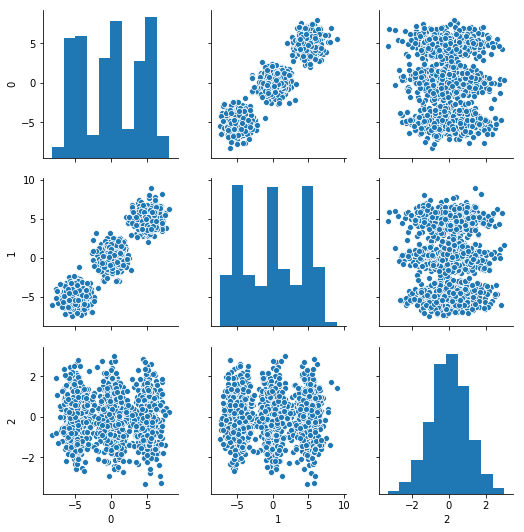

In [372]:
sns.pairplot(Blobs1)

<span style="color:green">Answer:</span> There seems to be negligible variance for the 3rd attribute when compared to first and 2nd one. The spread in third attribute's histogram is very less as compared to the other two attributes

<span style="color:red">**Question 7b:** </span> Perform PCA on **Blobs1** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [373]:
pca = PCA(2)
projected1 = pca.fit_transform(Blobs1)
print(Blobs1.shape)
print(projected1.shape)
projected1_new = pd.DataFrame(projected1,columns=['pc1','pc2'])

(1500, 3)
(1500, 2)


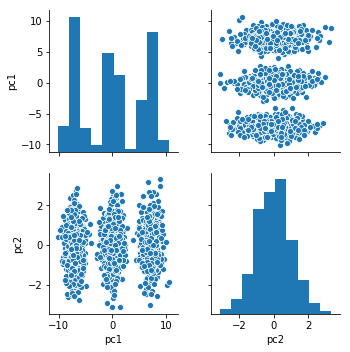

In [374]:
sns.pairplot(projected1_new)

<span style="color:red">**Question 7c:** </span> By comparing the distributions for the newly generated attributes in Question 7b with the previous pairplot in Question 7a, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Provide a reason for your observations.

<span style="color:green">Answer:</span> The first PC seems to capture first and second component while the 2nd PC seems to capture the third one. As seen in the graph, the 1st PC looks like a combined version of first and second attributes and 2nd PC has very similar distribution as third attribute. If we see the pairplot, the maximum covariance is along 1st and 2nd directions which is captured in the first PC that causes the PC1

<span style="color:red">**Question 7d:** </span> Plot pairplot for **Blobs2** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

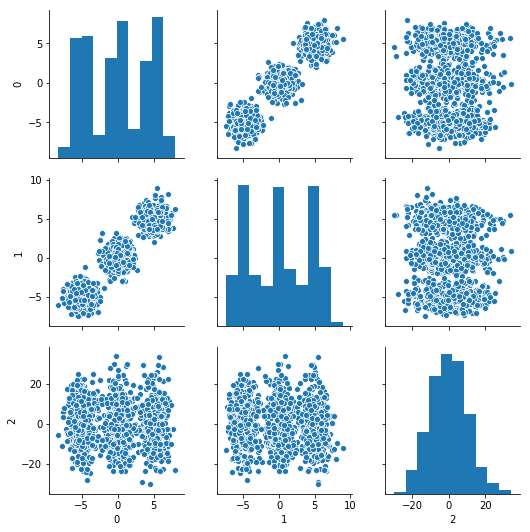

In [375]:
sns.pairplot(Blobs2)

<span style="color:green">Answer:</span> The variance of 3rd attribute has become 100 times of that of 3rd attribute of Blobs1. This is because we scale the 3rd attribute for Blobs2 by 10 times. In comparison to first 2 attributes, the variance of the third one is very high

<span style="color:red">**Question 7e:** </span> Perform PCA on **Blobs2** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [376]:
pca = PCA(2)
projected2 = pca.fit_transform(Blobs2)
print(Blobs2.shape)
print(projected2.shape)
projected2_new = pd.DataFrame(projected2,columns=['pc1','pc2'])

(1500, 3)
(1500, 2)


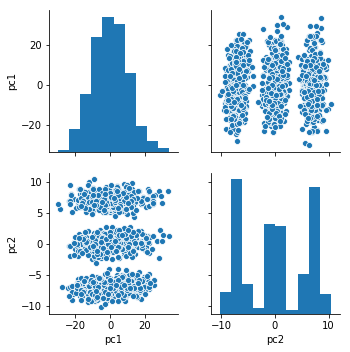

In [377]:
sns.pairplot(projected2_new)

<span style="color:red">**Question 7f:** </span> By comparing the distributions for the newly generated attributes in Question 7e with the previous pairplot in Question 7d, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7c)?

<span style="color:green">Answer:</span> The first PC captures the third attribute's proportion at a higher scale while second PC captures the first and second attribute's combination. This is because of the factor 10 that was multiplied with the random column generated. This factor got squared for the variance and hence, the maximum variance is captured along the third component

<span style="color:red">**Question 7g:** </span> Are the three blobs separately visible after projection based on PCA in Question 7e?

<span style="color:green">Answer:</span> Yes, they are separately visible

<span style="color:red">**Question 7h:** </span> Plot pairplot for **Blobs3** data. By visually examining this plot, comment on the strength of the correlation between the first two attributes. Also, comment on the strength of the correlation between the second two attributes.

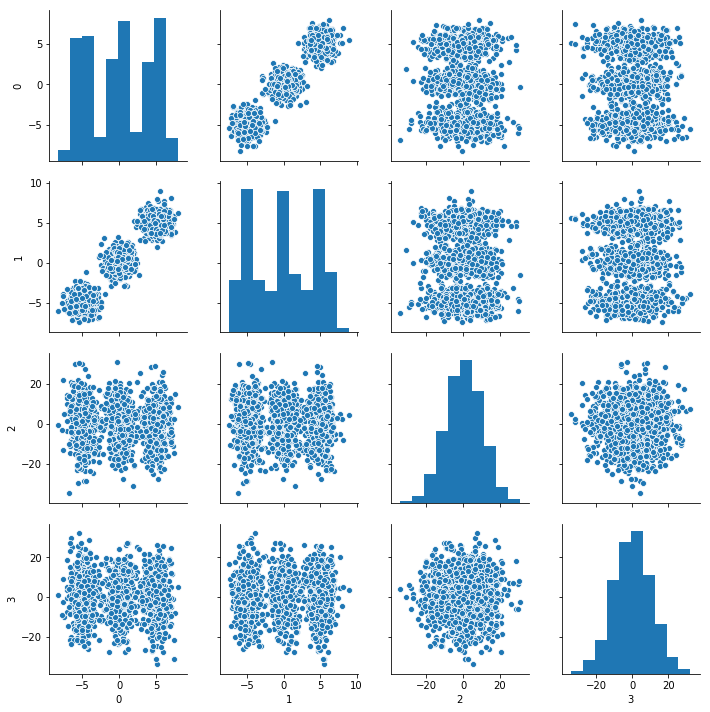

In [378]:
sns.pairplot(Blobs3)

<span style="color:green">Answer:</span> By visual examining, the first 2 attributes are strongly correlated while the next 2 are uncorrelated

<span style="color:red">**Question 7i:** </span> Perform PCA on **Blobs3** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [379]:
pca = PCA(2)
projected3 = pca.fit_transform(Blobs3)
print(Blobs3.shape)
print(projected3.shape)
projected3_new = pd.DataFrame(projected3,columns=['pc1','pc2'])

(1500, 4)
(1500, 2)


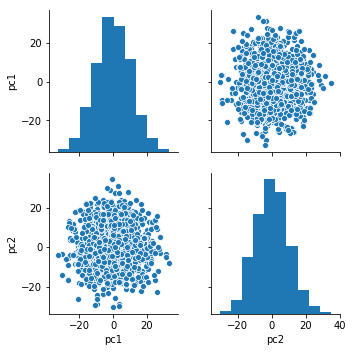

In [380]:
sns.pairplot(projected3_new)

<span style="color:red">**Question 7j:** </span>  By comparing the distributions for the newly generated attributes in Question 7i with the previous pairplot in Question 7h, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7f and 7c)?

<span style="color:green">Answer:</span> The first pc & 2nd pc captures the combination of 3rd & 4th attribute as the variance is these directions is highest. This is because the magnitude  of 3rd and 4th attribute has been scaled up 10x. This has caused the variance of last 2 attributes to jump 100x while the variance for the first two attributes remains same.

<span style="color:red">**Question 7k:** </span>  Are the three blobs separately visible after projection based on PCA in Question 7i? What would have caused this, in comparison to your observation in Question 7g?

<span style="color:green">Answer:</span> No, these blobs are not separately visible. In 7g there was only one variable that was scaled up 10 times while here, there are two variables scaled by 10 times. Since we are taking principal components in only 2 directions, the top two directions where the variance is highest, are getting captured while the information of blob clusters stored in attributes 1 and 2 is getting vanished. If we take PCA in 3rd direction, we will get the clusters

(1500, 4)
(1500, 3)


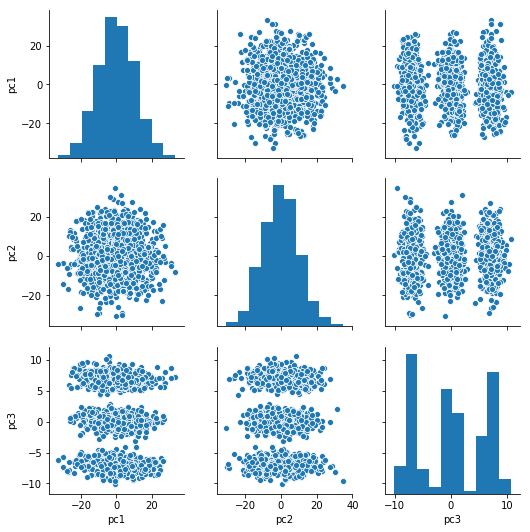

In [381]:
# Reasoning for 7k
pca = PCA(3)
projected4 = pca.fit_transform(Blobs3)
print(Blobs3.shape)
print(projected4.shape)
projected4_new = pd.DataFrame(projected4,columns=['pc1','pc2','pc3'])
sns.pairplot(projected4_new)

<span style="color:red">**Question 7l:** </span>  What limitation of PCA do your observations in Questions 7j, 7f, and 7c highlight?

<span style="color:green">Answer:</span> We may lose some useful information while reducing dimensions using PCA. There may be a high variance in some particular directions but not necessarily they will provide necessary information always. The reason being that the data not being normalized & will be biased towards higher valued variance. Also, PCA assumes that there is correlation between the values which is missed in the Blobs3

### 8. Singular Value Decomposition

<span style="color:green"> **(Optional)** </span> <span style="color:red">Question 8a: </span> Using the code provided in the practice notebook for computing PCA, write your own SVD function (U,S,V = mysvd(A)) to factorize the matrix A into U,S, and V.

In [382]:
s,v = np.linalg.eig(np.matmul(np.transpose(A),A))

In [383]:
s1,u = np.linalg.eig(np.matmul(A,np.transpose(A)))

In [384]:
I=[[1,0,0,0,0,0],
   [0,1,0,0,0,0],
   [0,0,1,0,0,0],
   [0,0,0,1,0,0],
   [0,0,0,0,1,0],
   [0,0,0,0,0,1],
   [0,0,0,0,0,0]]
a = I * s
print(np.shape(u))
print(np.shape(a))
print(np.shape(v))
# s

(7, 7)
(7, 6)
(6, 6)


In [385]:
v

array([[ 5.74341650e-01,  5.36733664e-02, -1.37443928e-01,
         3.85175292e-01,  7.06068137e-01, -8.83299320e-03],
       [ 5.80325620e-01, -4.87942348e-03,  2.69935331e-01,
        -7.68331493e-01, -7.61411253e-15,  4.34311326e-17],
       [ 5.74341650e-01,  5.36733664e-02, -1.37443928e-01,
         3.85175292e-01, -7.06068137e-01,  8.83299320e-03],
       [ 4.05361801e-02, -6.77494984e-01,  1.73652236e-01,
         9.59284412e-02, -3.83116966e-02, -7.07051609e-01],
       [ 4.05361801e-02, -6.77494984e-01,  1.73652236e-01,
         9.59284412e-02,  3.83116966e-02,  7.07051609e-01],
       [ 1.41120107e-02, -2.76071774e-01, -9.10518013e-01,
        -3.07477112e-01, -3.09652107e-15,  4.27281830e-17]])

<span style="color:green"> **(Optional)** </span>  <span style="color:red">Question 8b: </span> Demonstrate that your code is correct by using your function on the following matrix $A$ and showing that the product $USV^T=A$.

In [386]:
A = np.array([
    [1, 1, 1, 0, 0, 0],
    [3, 3, 3, 0, 0, 0],
    [4, 4, 4, 0, 0, 0],
    [5, 5, 5, 0, 0, 0],
    [0, 1, 0, 4, 4, 1],
    [0, 0, 0, 5, 5, 2],
    [0, 0, 0, 2, 2, 2]])
# projected = u * a * np.transpose(v)

<span style="color:red">**Question 8c:**</span> Perform SVD on iris dataset and visualize the proportion of variance captured by each spectral value. List the dimensions that captures less than 10% of the total variance.

In [387]:
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [388]:
data = iris_df.values[:,0:4]
data = data.astype(float) #converts data format from object to numeric

In [389]:
U, S, V = svd(data, full_matrices = False)

In [390]:
np.cumsum(S)/np.sum(S)

array([0.80616025, 0.95506531, 0.98421372, 1.        ])

<span style="color:green">Answer:</span> The first two dimensions capture ~95.5% of the total variance while the last 2 dimensions capture less than 5% of total variance.

<span style="color:red">**Question 8d:**</span> The heatmap of the full data is shown below. Plot all the four spectral decomposition matrices based on SVD.

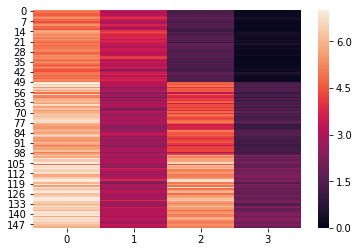

In [391]:
sns.heatmap(data,vmin=0, vmax=7)

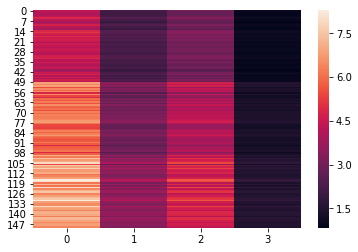

In [392]:
sns.heatmap(S[0]*np.outer(U[:,0],V[0,:]))

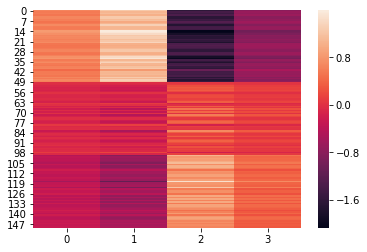

In [393]:
sns.heatmap(S[1]*np.outer(U[:,1],V[1,:]))

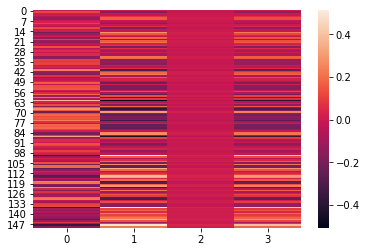

In [394]:
sns.heatmap(S[2]*np.outer(U[:,2],V[2,:]))

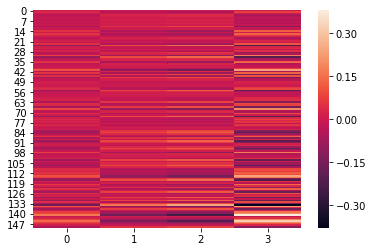

In [395]:
sns.heatmap(S[3]*np.outer(U[:,3],V[3,:]))

<span style="color:red">**Question 8e:**</span> Visually examine the magnitude of values present in each of the four spectral decomposition matrices and comment on which two of the four matrices have elements with relatively small magnitude in them. Provide a reason for this based on your obsevation in Question 8c. 

<span style="color:green">Answer:</span> Visually examining heatmap of the entire data, it looks like the first two spectral decomposition matrices cover major chunk of the data distribution while the last two seem to have smaller magnitude in them. As seen in 8c, the first two spectral decomposition matrices covers ~95.5% of the data, while the last two matrices have less than 5% data. 

### 9. Linear Discriminant Analysis

We will use digits data for studying the use of LDA.

In [396]:
digits = load_digits()

The data with 1797 samples and 64 attributes is in the object digits.data. These 64 attributes represent pixels in an 8x8 image.

In [397]:
digits.data.shape

(1797, 64)

The 1797 images are digits from 0...9. This information is in the digits.target variable.

In [398]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

For this part, we will only focus on digits 3 and 8. To this end, we generate indices of 183 samples with 3s and indices of 174 samples with 8s.

In [399]:
Threes = np.where(digits.target==3)
Eights = np.where(digits.target==8)
[np.size(Threes), np.size(Eights)]

[183, 174]

We will take samples from these indices and construct a matrix X such that the first 183 samples represent 3s and the remaining ones represent 8s. The variable y captures this information.

In [400]:
indices = np.hstack((Threes[0], Eights[0]));
X = digits.data[indices,:]
y = np.hstack((3*np.ones(np.size(Threes)), 8*np.ones(np.size(Eights))))

In [401]:
X

array([[ 0.,  0.,  7., ...,  9.,  0.,  0.],
       [ 0.,  2.,  9., ..., 11.,  0.,  0.],
       [ 0.,  1.,  8., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [402]:
X.shape

(357, 64)

In [403]:
y

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8.

In [404]:
y.shape

(357,)

<span style="color:red">**Question 9a:**</span> Visually examine the following heatmap of the data X and comment which among attributes 43 and 45 can separate the 3s from 8s better.

[Text(159.0, 0.5, 'Samples'), Text(0.5, 69.0, 'Attributes')]

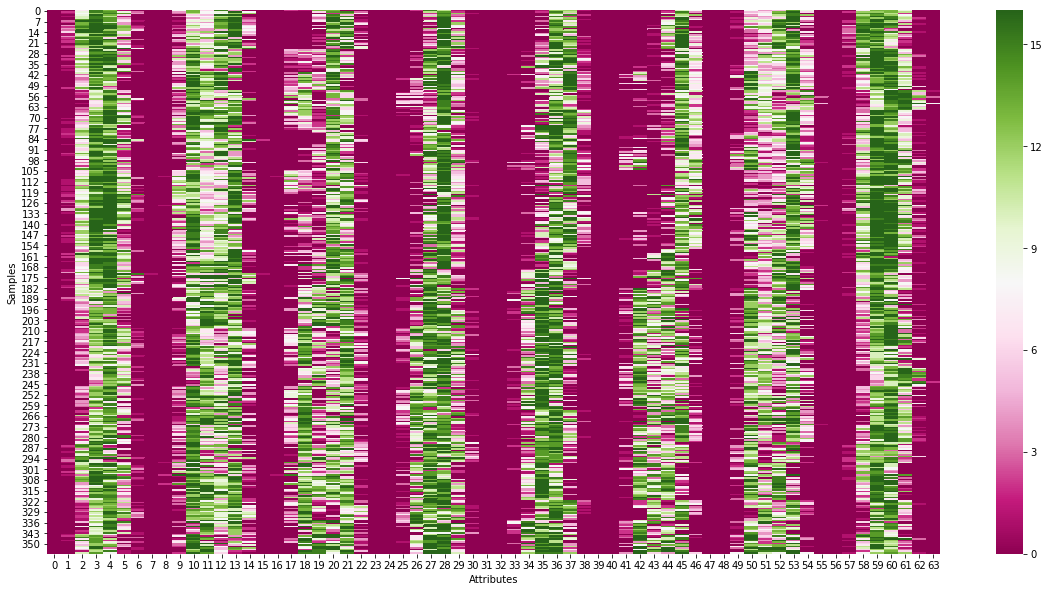

In [405]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')


<span style="color:green">Answer:</span> Attribute 43 can separate 3s from 8s better than 45 since we can clearly see 2 different classes through attribute 43 (pink and green) while 45 doesn't clearly classify the two classes

<span style="color:red">**Question 9b:**</span> Perform LDA on this data. Plot the heatmap of the projected data and comment if the resultant projection is better than the best attribute between 43 and 45.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[Text(159.0, 0.5, 'Samples'), Text(0.5, 69.0, 'Attributes')]

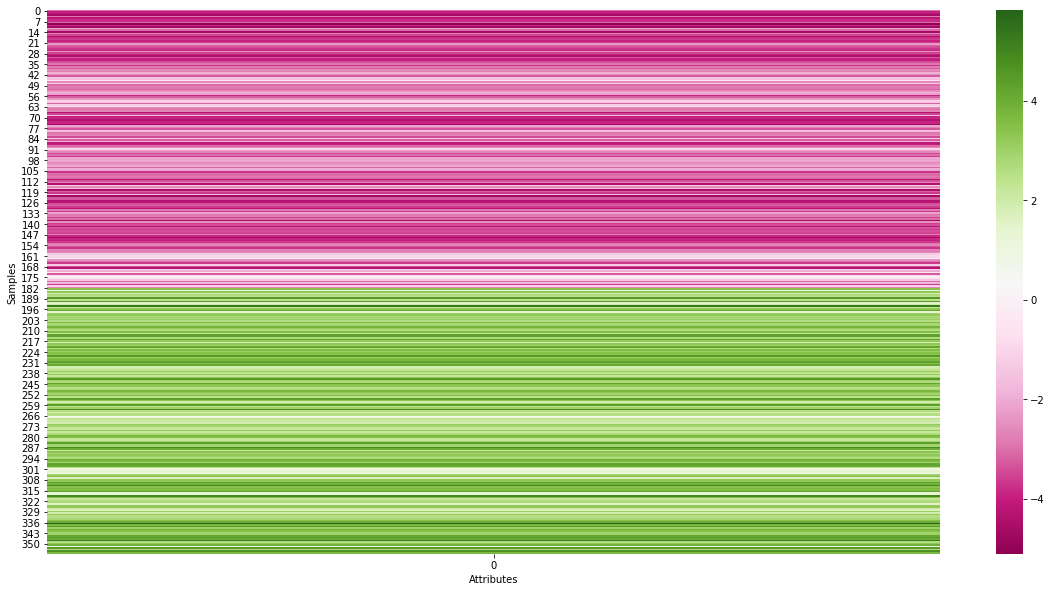

In [406]:

lda = LinearDiscriminantAnalysis()
X_r1 = lda.fit_transform(X, y)
plt.figure(figsize=(20,10))
ax = sns.heatmap(X_r1,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')

<span style="color:green">Answer:</span> Yes, performing LDA gives a clear distinction between the two classes in the data

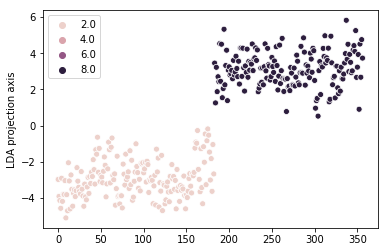

In [407]:
fig = sns.scatterplot(x=np.arange(np.size(X_r1)),y=X_r1[:,0],hue=y)
plt.ylabel('LDA projection axis')
plt.show(fig)